In [117]:
%matplotlib widget
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt

from spectrometer import plot
cm = 1 / 2.54

In [118]:
def rect(t) -> npt.NDArray:
    return np.where(np.abs(t) <= 0.5, 1, 0)


def pulse(t, freq) -> npt.NDArray:
    return np.sin(2 * np.pi * freq * t) * rect(t)

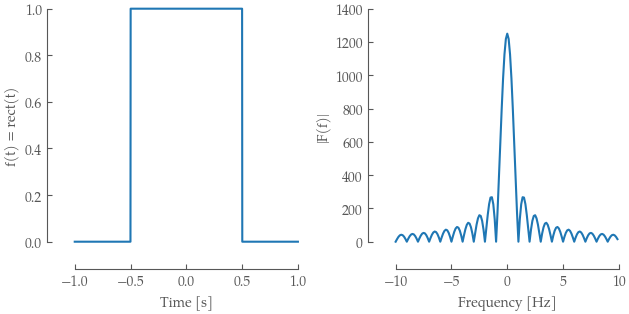

In [119]:
fig, axes = plot.subplots(nrows=1, ncols=2, figsize=(16 * cm, 8 * cm))
t = np.linspace(-4, 4, 10000)

y = rect(t)
axes[0].plot(t[3750:-3750], y[3750:-3750])
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("f(t) = rect(t)")

fft = np.fft.fft(y)
f = np.fft.fftfreq(n=fft.size, d=np.abs(t[0] - t[1]))
axes[1].plot(np.fft.fftshift(f)[4920:5080], np.abs(np.fft.fftshift(fft))[4920:5080])
axes[1].set_xlabel("Frequency [Hz]")
axes[1].set_ylabel("|F(f)|")

for ax in axes:
    plot.format_axes(ax)

fig.savefig("1s_rect_pulse_fft.svg")

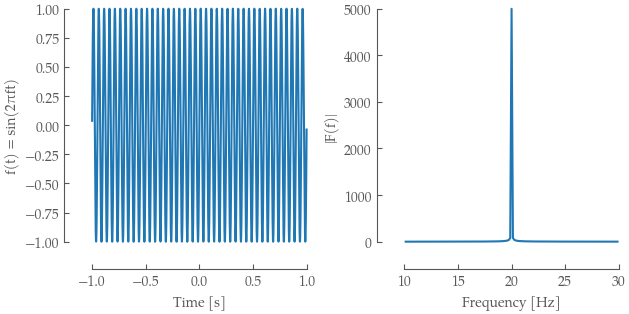

In [120]:
fig, axes = plot.subplots(nrows=1, ncols=2, figsize=(16 * cm, 8 * cm))
t = np.linspace(-4, 4, 10000)

y = np.sin(2 * np.pi * 20 * t)
axes[0].plot(t[3750:-3750], y[3750:-3750])
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("f(t) = sin(2πft)")

fft = np.fft.fft(y)
f = np.fft.fftfreq(n=fft.size, d=np.abs(t[0] - t[1]))
axes[1].plot(f[81:240], np.abs(fft[81:240]))
axes[1].set_xlabel("Frequency [Hz]")
axes[1].set_ylabel("|F(f)|")

for ax in axes:
    plot.format_axes(ax)

fig.savefig("20hz_inf_fft.svg")

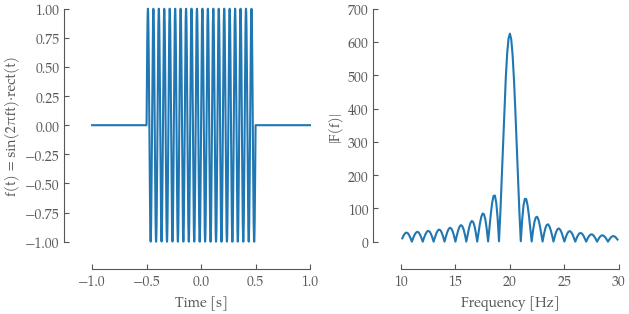

In [121]:
fig, axes = plot.subplots(nrows=1, ncols=2, figsize=(16 * cm, 8 * cm))
t = np.linspace(-4, 4, 10000)

y = pulse(t, freq=20)
axes[0].plot(t[3750:-3750], y[3750:-3750])
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("f(t) = sin(2πft)·rect(t)")

fft = np.fft.fft(y)
f = np.fft.fftfreq(n=fft.size, d=np.abs(t[0] - t[1]))
axes[1].plot(f[81:240], np.abs(fft[81:240]))
axes[1].set_xlabel("Frequency [Hz]")
axes[1].set_ylabel("|F(f)|")

for ax in axes:
    plot.format_axes(ax)

fig.savefig("20hz_1s_pulse_fft.svg")